In [4]:
import torch
import torch.nn as nn
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, requires_grad=True)
        nn.init.xavier_normal_(self.w2)


In [ ]:
# z = wx + b, loss = (y-z)^2

In [6]:
# Layers are stored in a cascaded way 
model = nn.Sequential(
    nn.Linear(4, 16), 
    nn.ReLU(), 
    nn.Linear(16, 32), 
    nn.ReLU()
)

model 

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [8]:
# specify initial value distribution for weight for first layer
nn.init.xavier_uniform_(model[0].weight)
# l1 penatly for second layer weight matrix
l1_weight = 0.01
# l1 norm fo the second layer weights 
l1_penalty = l1_weight * model[2].weight.abs().sum()
# binary cross entropy loss 
loss_fn = nn.BCELoss()
# sgd
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


Parameter containing:
tensor([[ 0.0189, -0.0855,  0.0801,  0.4646],
        [ 0.3254, -0.2396,  0.2466, -0.3965],
        [-0.0038,  0.3702,  0.1401, -0.0014],
        [-0.1863,  0.0554,  0.0802,  0.4485],
        [-0.2715, -0.2417,  0.2955, -0.3855],
        [-0.1559,  0.4251, -0.3578,  0.3088],
        [ 0.3604, -0.4843,  0.2090, -0.4453],
        [ 0.0040,  0.3824,  0.3974,  0.1489],
        [-0.3173,  0.4308, -0.0175, -0.2904],
        [ 0.2889,  0.1207,  0.4217, -0.1976],
        [-0.1088,  0.0328, -0.1412, -0.3986],
        [ 0.1739, -0.1055,  0.4551, -0.0625],
        [ 0.2579,  0.2532, -0.1628,  0.1231],
        [ 0.1526,  0.4913,  0.1457,  0.4519],
        [ 0.0239, -0.4132,  0.2088,  0.1589],
        [-0.2417, -0.3112, -0.4292, -0.3289]], requires_grad=True)

In [9]:
# XOR classification problem
# generate toy dataset of 200 training exampels with features x0, x1
# x0, x1 drawn from uniform dist. between [-1, 1)
# y = 0 if xo*x1 < 0 else 1
import matplotlib.pyplot as plt 
import numpy as np 
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))

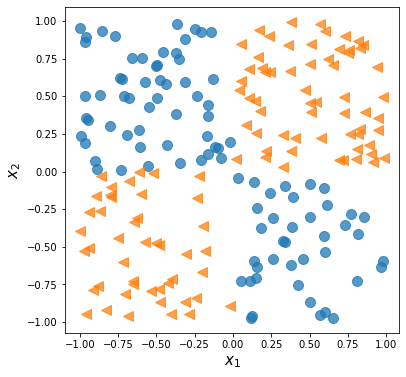

In [13]:
y = np.ones(len(x))
y[x[:,0] * x[:,1] < 0] = 0 
n_train = 100 
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)
fig = plt.figure(figsize=(6,6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()